In [ ]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.layers import *
from keras import models
model = models.Sequential()
from keras.preprocessing import image

In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,
                              input_shape=(128,128, 3))


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,845,121
Trainable params: 16,845,121


In [ ]:
model.compile(optimizer="adam",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/preprocess_data/train",
                                            image_size=(128,128), batch_size=32)

Found 4190 files belonging to 2 classes.


In [ ]:
val_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/preprocess_data/val",
                                             image_size=(128,128),batch_size=32)

Found 1196 files belonging to 2 classes.


In [ ]:
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/preprocess_data/test",
                                             image_size=(128,128),batch_size=32)

Found 602 files belonging to 2 classes.


In [ ]:

history = model.fit(train_dataset,validation_data = val_dataset, epochs=10)

Epoch 1/10
131/131 [==============================] - 33s 205ms/step - loss: 1.9240 - accuracy: 0.6757 - val_loss: 0.2037 - val_accuracy: 0.9289
Epoch 2/10
131/131 [==============================] - 22s 167ms/step - loss: 0.2133 - accuracy: 0.9284 - val_loss: 0.0977 - val_accuracy: 0.9774
Epoch 3/10
131/131 [==============================] - 23s 170ms/step - loss: 0.1123 - accuracy: 0.9637 - val_loss: 0.0881 - val_accuracy: 0.9741
Epoch 4/10
131/131 [==============================] - 23s 170ms/step - loss: 0.1173 - accuracy: 0.9671 - val_loss: 0.0994 - val_accuracy: 0.9699
Epoch 5/10
131/131 [==============================] - 22s 168ms/step - loss: 0.0913 - accuracy: 0.9709 - val_loss: 0.0876 - val_accuracy: 0.9732
Epoch 6/10
131/131 [==============================] - 22s 167ms/step - loss: 0.0695 - accuracy: 0.9780 - val_loss: 0.0685 - val_accuracy: 0.9791
Epoch 7/10
131/131 [==============================] - 22s 168ms/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.0599 - val_ac

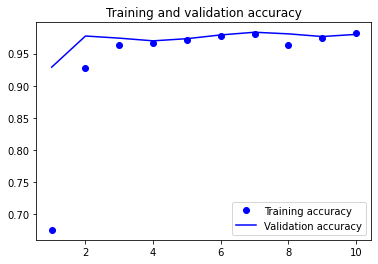

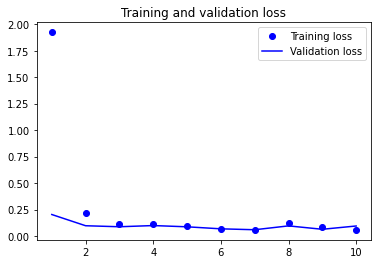

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(test_dataset)

19/19 [==============================] - 2s 62ms/step - loss: 0.1536 - accuracy: 0.9751


In [ ]:
print(scores[1])

0.97508305311203


In [ ]:
import numpy as np
import pandas as pd